In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [3]:
data = pd.read_csv("log.txt", sep="\t", header=None, names=["timestamp", "x", "y", "theta", "v", "w"])

data["nanosecs"] = data.apply(lambda row: re.match("(?:builtin_interfaces\.msg\.Time\(sec=\d+, nanosec=)(\d+)(?:\))", row.timestamp).group(1), axis=1)
data["secs"] = data.apply(lambda row: re.match("(?:builtin_interfaces\.msg\.Time\(sec=)(\d+)(?:, nanosec=\d+\))", row.timestamp).group(1), axis=1)

data["g_timestamp"] = data.apply(lambda row: np.float64(row.secs) + np.float64(row.nanosecs) * 10e-10, axis=1)

data

,timestamp,x,y,theta,v,w,nanosecs,secs,g_timestamp
0,"builtin_interfaces.msg.Time(sec=1694394932, na...",-1.999597,-0.499998,0.014327,0.000062,-0.000254,594821671,1694394932,1.694395e+09
1,"builtin_interfaces.msg.Time(sec=1694394932, na...",-1.999597,-0.499998,0.014328,0.000046,-0.000245,651017189,1694394932,1.694395e+09
2,"builtin_interfaces.msg.Time(sec=1694394932, na...",-1.999597,-0.499998,0.014330,0.000062,-0.000276,705372029,1694394932,1.694395e+09
3,"builtin_interfaces.msg.Time(sec=1694394932, na...",-1.999597,-0.499998,0.014332,0.000066,-0.000279,741940403,1694394932,1.694395e+09
4,"builtin_interfaces.msg.Time(sec=1694394932, na...",-1.999597,-0.499998,0.014334,0.000075,-0.000280,767001814,1694394932,1.694395e+09
...,...,...,...,...,...,...,...,...,...
379,"builtin_interfaces.msg.Time(sec=1694394948, na...",-1.999578,-0.499998,0.015059,0.000079,-0.000284,524187590,1694394948,1.694395e+09
380,"builtin_interfaces.msg.Time(sec=1694394948, na...",-1.999578,-0.499998,0.015061,0.000062,-0.000258,561599302,1694394948,1.694395e+09
381,"builtin_interfaces.msg.Time(sec=1694394948, na...",-1.999578,-0.499998,0.015062,0.000046,-0.000245,610160324,1694394948,1.694395e+09
382,"builtin_interfaces.msg.Time(sec=1694394948, na...",-1.999578,-0.499998,0.015064,0.000068,-0.000281,649397340,1694394948,1.694395e+09


## a)

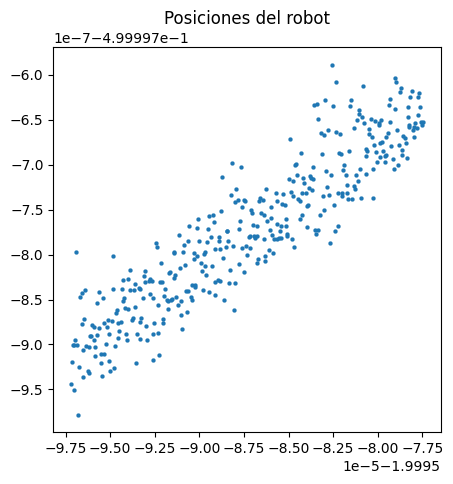

In [4]:
plt.rcParams["figure.figsize"] = (5,5)

plt.scatter(data.x, data.y, marker=".", linewidths=0.1)
plt.title("Posiciones del robot")
plt.savefig("a", dpi=600)
plt.show()

plt.rcParams["figure.figsize"] = (6.4, 4.8)

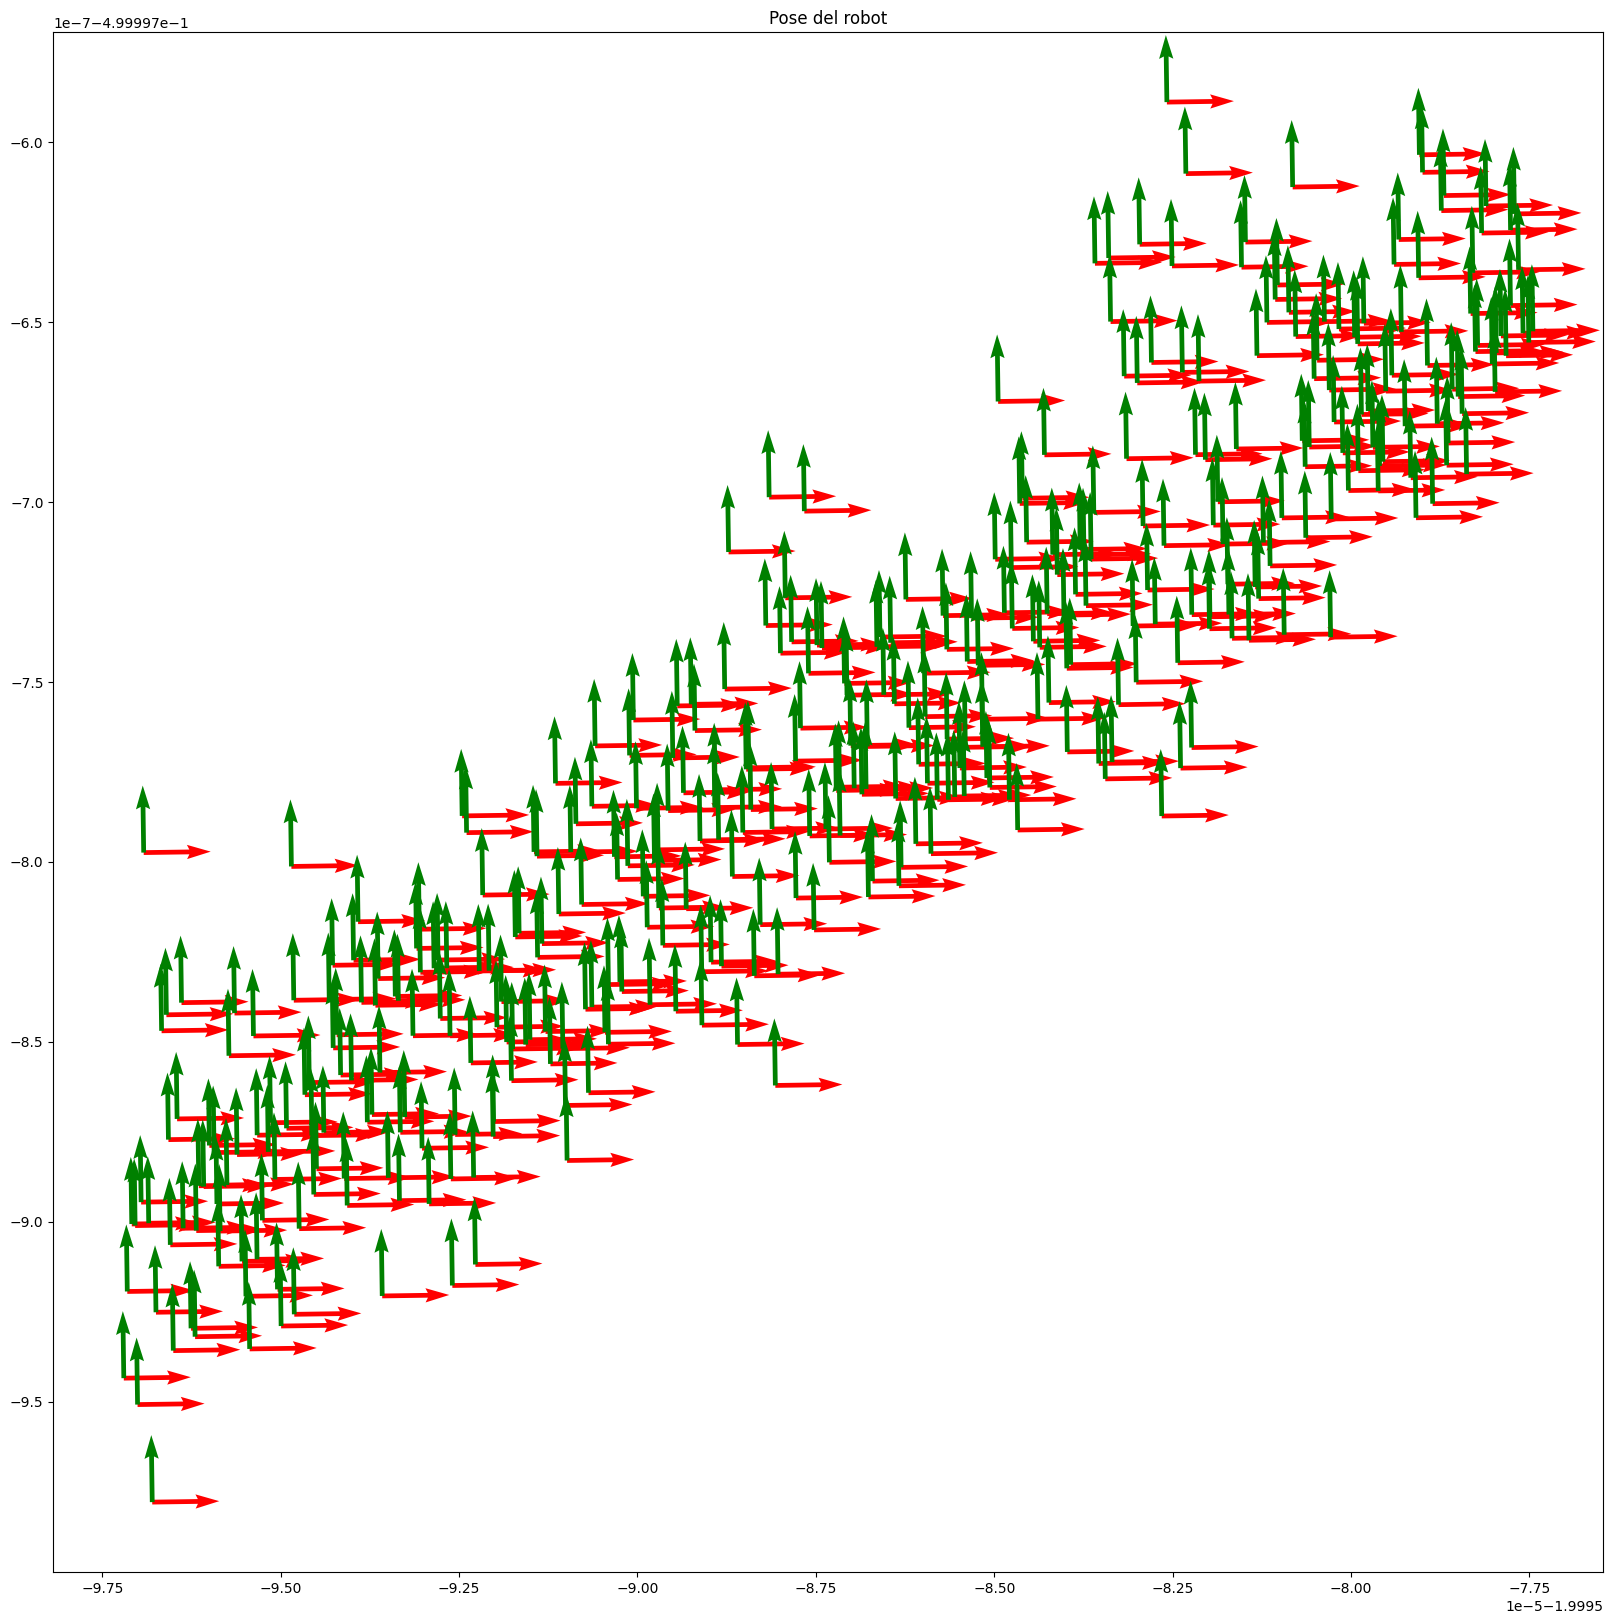

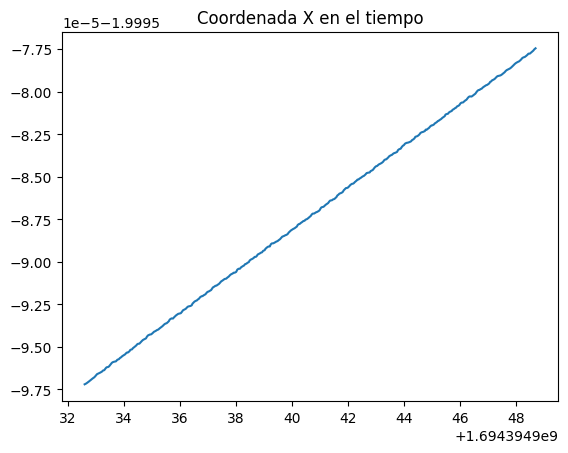

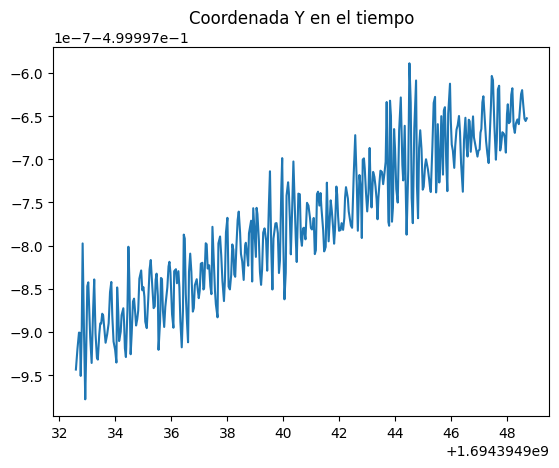

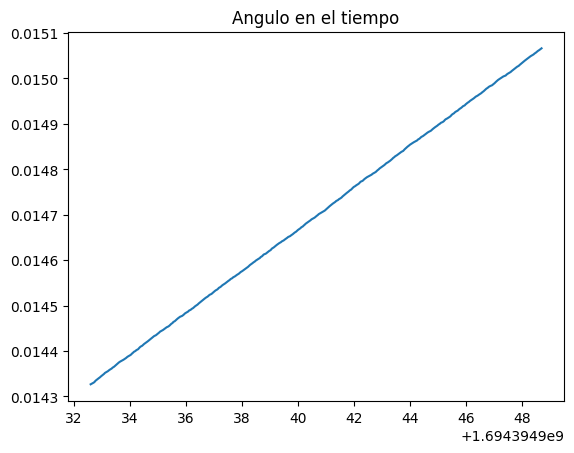

In [19]:
plt.rcParams["figure.figsize"] = (20,20)

plt.quiver(data.x, data.y, np.cos(data.theta), np.sin(data.theta), color='r', units='xy', scale=1.5e6, linewidths=0.1)
plt.quiver(data.x, data.y, -np.sin(data.theta), np.cos(data.theta), color='g', units='xy', scale=1.5e6, linewidths=0.1)

plt.title("Pose del robot")
plt.savefig("b", dpi=600)
plt.show()

plt.rcParams["figure.figsize"] = (6.4, 4.8)

plt.plot(data.g_timestamp, data.x)
plt.title("Coordenada X en el tiempo")
plt.show()

plt.plot(data.g_timestamp, data.y)
plt.title("Coordenada Y en el tiempo")
plt.show()

plt.plot(data.g_timestamp, data.theta)
plt.title("Angulo en el tiempo")
plt.show()

## c)

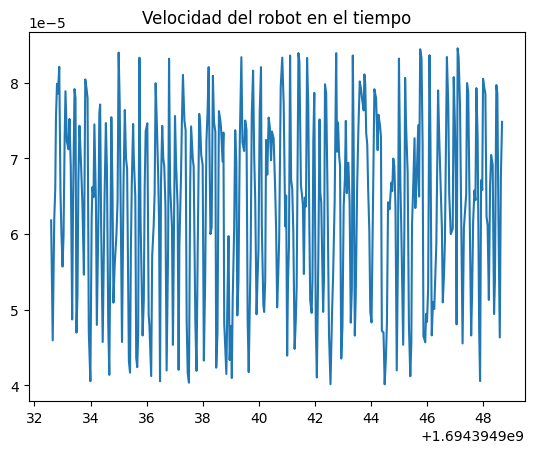

In [6]:
plt.plot(data.g_timestamp, data.v)
plt.title("Velocidad del robot en el tiempo")
plt.savefig("c", dpi=600)
plt.show()